In [1]:
import torch 
import torch.nn as nn 
import torch.optim as optim 
import polars as pl  
import numpy as np 
import matplotlib.pyplot as plt 
import lightgbm as lgb
import os 

In [2]:
# Load the weights of LGB models using polars 

# Create a list to store the models
models = []
# dir = 'models_params_save'
dir = ''

# Load each model text file
for i in range(1, 6):
    model_file_path = os.path.join(dir, f'model_{i}.txt')
    model = lgb.Booster(model_file=model_file_path)
    models.append(model)

In [18]:
weight_sum = models[0].feature_importance() 

for i in range(2,5): 
    weight_sum += models[i].feature_importance() 

In [19]:
norm_weights = weight_sum/ np.sum(weight_sum)


(array([14., 12., 26., 42., 29.,  9., 13.,  7.,  6.,  2.]),
 array([0.00028016, 0.00181983, 0.00335951, 0.00489918, 0.00643885,
        0.00797852, 0.00951819, 0.01105786, 0.01259754, 0.01413721,
        0.01567688]),
 <BarContainer object of 10 artists>)

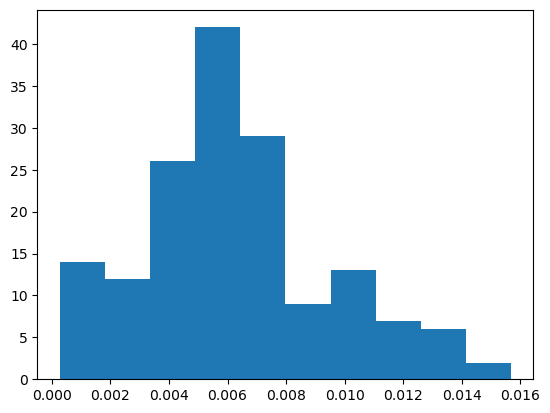

In [20]:
plt.hist(norm_weights)

In [21]:
np.where(norm_weights<0.005)[0] , len(np.where(norm_weights<0.0)[0] )

(array([  3,  12,  13,  14,  15,  17,  18,  19,  24,  25,  26,  27,  28,
         29,  33,  41,  45,  46,  49,  51,  52,  53,  61,  62,  63,  79,
         81,  83,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
         97,  98,  99, 100, 101, 114, 115, 116, 118, 120, 122, 124, 126,
        151, 152, 153]),
 160)

In [7]:
norm_weight1 = models[0].feature_importance()/ max(models[0].feature_importance())
norm_weight1 = models[0].feature_importance()/ max(models[0].feature_importance())
norm_weight1 = models[0].feature_importance()/ max(models[0].feature_importance())
norm_weight1 = models[0].feature_importance()/ max(models[0].feature_importance())
norm_weight5 = models[4].feature_importance()/ max(models[4].feature_importance())

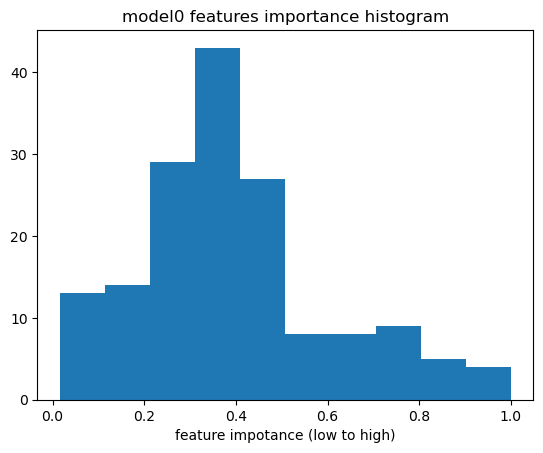

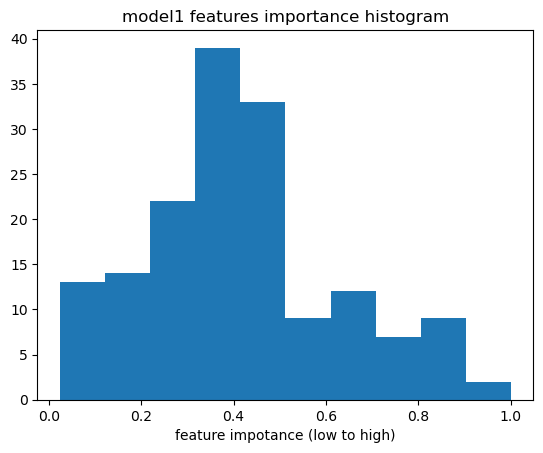

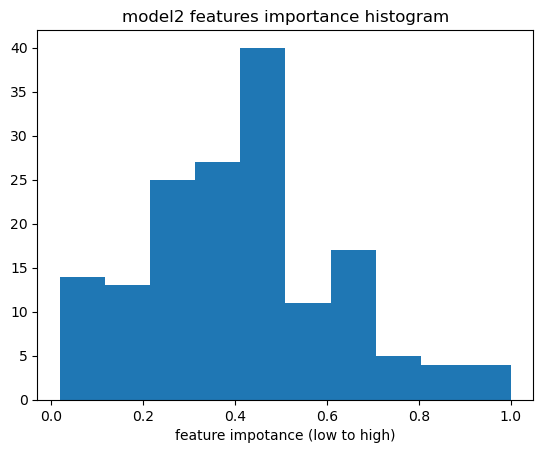

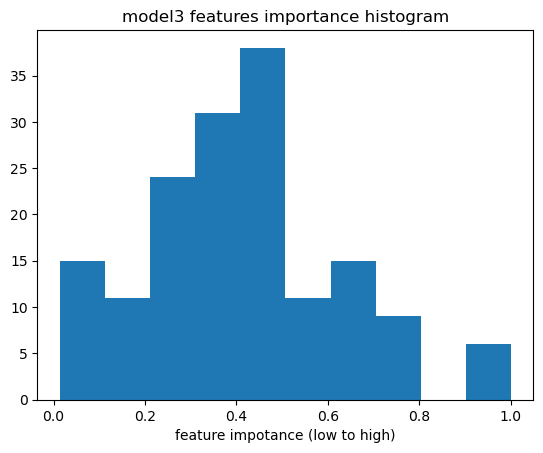

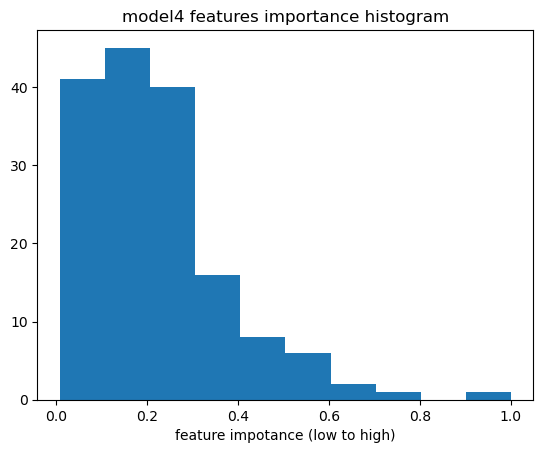

In [8]:
for i in range(5): 
    norm_weight = models[i].feature_importance()/ max(models[i].feature_importance())
    plt.hist(norm_weight)
    plt.title(f'model{i} features importance histogram')
    plt.xlabel('feature impotance (low to high)')
    plt.show()